In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

import recova.learning_dataset
from recova.learning.learning import model_from_file
from recova.util import kullback_leibler, wishart_kl_divergence

np.set_printoptions(precision=3, linewidth=100)

In [59]:
DATASET_FILE = '/home/dlandry/dataset/learning_sets/2018-08-20-kitti-5-10.json'
LEARNING_RUN_FILE = '/home/dlandry/dataset/learning_runs/2018-08-20-kitti-10-05.json'
MODEL_FILE = '/home/dlandry/dataset/learning_runs/2018-08-20-kitti-10-05.model'
CENSI_ESTIMATES_FILE = '/home/dlandry/dataset/censi_estimates/2018-08-20-kitti05.json'

In [60]:
with open(DATASET_FILE) as f:
    dataset = json.load(f)
    
with open(LEARNING_RUN_FILE) as f:
    learning_run = json.load(f)

with open(CENSI_ESTIMATES_FILE) as f:
    censi_estimates = json.load(f)
    
model = model_from_file(MODEL_FILE, 'cello')

In [61]:
xs = np.array(dataset['data']['xs'])
ys = np.array(dataset['data']['ys'])


train_set = learning_run['train_set']
validation_set = learning_run['validation_set']

In [62]:
validation_xs = xs[validation_set]
validation_ys = ys[validation_set]

In [63]:
predictions = model.predict(validation_xs)
censi_predictions = np.array(censi_estimates['data']['censi_estimates'])

In [64]:
reference_norms = np.zeros(len(predictions))
prediction_norms = np.zeros(len(predictions))
norm_loss = np.zeros(len(predictions))
wishart_kl = np.zeros(len(predictions))
gaussian_kl = np.zeros(len(predictions))
percent_loss = np.zeros(len(predictions))
censi_loss = np.zeros(len(predictions))
censi_kl = np.zeros(len(predictions))

for i in range(len(predictions)):
    reference_norms[i] = np.linalg.norm(ys[validation_set[i]])
    prediction_norms[i] = np.linalg.norm(predictions[i])
    wishart_kl[i] = wishart_kl_divergence(ys[validation_set[i]], 6, predictions[i], 6)
    norm_loss[i] = np.linalg.norm(ys[validation_set[i]] - predictions[i])
    percent_loss = abs(norm_loss[i] / np.linalg.norm(ys[validation_set[i]]))
    gaussian_kl[i] = kullback_leibler(ys[validation_set[i]], predictions[i])
    
    censi_loss[i] = np.linalg.norm(ys[validation_set[i]] - censi_predictions[i])
    censi_kl[i] = kullback_leibler(ys[validation_set[i]], censi_predictions[i])
    
    print('{}: {}'.format(i, gaussian_kl[i]))

0: 5.791304228179948
1: 26.274787593721445
2: 25.936444789048764
3: 6.359238590403148
4: 8.112919616851254
5: 26.460272348332914
6: 26.131369551674076
7: 3.8151544400267507
8: 7.9943124795324945
9: 14.49976112553602
10: 6.978862133159318
11: 6.7699084380659365
12: 6.980034818643448
13: 26.59100351014144
14: 26.301398126712527
15: 26.32605895395588
16: 26.92931219943025
17: 26.587071460851543
18: 7.188784583605475
19: 26.080206658794562
20: 26.13614331689665
21: 26.079598899660596
22: 26.275020766015366
23: 13.215369436764918
24: 18.408900650028155
25: 6.499956905280899
26: 7.122481382281764
27: 7.285815977584406
28: 25.556188231044658
29: 6.571584112158314
30: 5.530650993971635
31: 26.03159170863319
32: 26.291202648565562
33: 8.440523763128345
34: 26.834265439898022
35: 6.893728480905573
36: 5.828274733122065
37: 9.365338651089758
38: 10.107974289697795
39: 27.285516137898767
40: 6.884269575088128
41: 26.602383509141355
42: 6.794159924133619
43: 101.62994510120075
44: 6.580356443115284

/home/dlandry/repos/registration-covariance-analysis/recova/util.py:277: RuntimeWarning: divide by zero encountered in log
  (scipy.special.multigammaln(prediction_degrees_of_freedom / 2., 6) - scipy.special.multigammaln(base_degress_of_freedom / 2., 6)) +
/home/dlandry/repos/registration-covariance-analysis/recova/util.py:277: RuntimeWarning: invalid value encountered in log
  (scipy.special.multigammaln(prediction_degrees_of_freedom / 2., 6) - scipy.special.multigammaln(base_degress_of_freedom / 2., 6)) +


424: 4.476340208775919
425: 6.821413086856597
426: 9.035339159300529
427: 5.87386104724869
428: 5.655441137360768
429: 27.9464280455623
430: 13.396421351929881
431: 5.465469568308067
432: 26.732196202399322
433: 12.561640868578143
434: 26.87110997784206
435: 78.94670272344712
436: 6.956813768800954
437: 5.478497928078471
438: 6.14198895202269
439: 6.878932069313427
440: 7.213343917000275
441: 7.6573541581336855
442: 4.244703367071292
443: 16.052312766364583
444: 26.245827072818578
445: 6.4111893619729
446: 6.609605247772684
447: 7.598863837809436
448: 26.13720837767195
449: 7.767896522045631
450: 7.127595091792868
451: 7.730712319629902
452: 7.211857095867195
453: 25.63701394385793
454: 77.11994854058477
455: 10.953015482286922
456: 7.425124982358646
457: 7.452381107511533
458: 26.179003807038153
459: 7.734665672804413
460: 25.58070274417028
461: 6.503853258946662
462: 20.777315287395872
463: 10.833418060645409
464: 6.741695394451106
465: 26.840589553372286
466: 5.146410133456923
467: 

784: 12.481853189229307
785: 26.256026170105276
786: 13.122481141340126
787: 26.219533679211832
788: 25.85249741343136
789: 27.181386487878527
790: 4.2603906855186935
791: 6.119194468471419
792: 7.0546243530338195
793: 81.53148973573892
794: 6.085760884426597
795: 12.604353897655503
796: 26.095651811310496
797: 6.629216100253284
798: 26.538926581921675
799: 26.424845142581262
800: 26.659331348057847
801: 26.301775904872144
802: 8.080457332465308
803: 25.219692293052756
804: 26.178001107250424
805: 26.99207926814218
806: 6.6141503120848455
807: 24.50154871223471
808: 6.262308925190847
809: 26.001413525536183
810: 13.962155101939214
811: 26.94832993571764
812: 7.546803455090825
813: 26.51786732907759
814: 26.630495086279552
815: 7.177004928226218
816: 6.693300804308513
817: 5.3222665822858595
818: 25.978399566636227
819: 28.14153632688209
820: 26.724285142981223
821: 26.932005342341178
822: 26.334610522626527
823: 26.175049385519127
824: 6.102728426060562
825: 26.025961524079428
826: 20.

1166: 7.842353835022449
1167: 5.422126421160574
1168: 7.88394705612105
1169: 14.502969657436626
1170: 7.707605587206727
1171: 4.478434526390203
1172: 26.561041837593184
1173: 8.415237968429487
1174: 25.91876240716856
1175: 5.35044546841214
1176: 26.678516313497425
1177: 7.053353115766776
1178: 25.878795454043185
1179: 25.67111881067345
1180: 7.5316819339431245
1181: 25.82573145107409
1182: 7.618925066403904
1183: 26.325497323449433
1184: 10.128899569750608
1185: 8.47015273508854
1186: 5.4677499747524605
1187: 7.373112618490481
1188: 26.0081098611546
1189: 26.356104399638905
1190: 6.360904376548628
1191: 7.707789528869543
1192: 6.944659211938355
1193: 7.29572994693977
1194: 26.47643484795327
1195: 26.54073703593362
1196: 26.575092816545492
1197: 12.614824288126464
1198: 26.363917967833117
1199: 5.440199564832293
1200: 7.077324815824962
1201: 8.93152852183744
1202: 8.49874880422458
1203: 8.206967670288243
1204: 25.34265865956245
1205: 6.118006242107844
1206: 26.84991479177949
1207: 26.77

1582: 7.049498195160389
1583: 6.1103531824343476
1584: 6.074491259914392
1585: 66.75436567126845
1586: 7.165068274687332
1587: 6.181660299870964
1588: 7.066640259109414
1589: 25.991258080959817
1590: 6.150917990866925
1591: 25.697369558086642
1592: 24.774037964841185
1593: 26.607505269938073
1594: 6.84242506553063
1595: 7.634324679268589
1596: 26.32288765063337
1597: 4.906990552471383
1598: 26.13734123406315
1599: 6.739705318470984
1600: 26.45689852535267
1601: 24.820259137962914
1602: 6.589194942397717
1603: 25.932842643526023
1604: 6.906482808256305
1605: 26.950725665410065
1606: 8.872907447516123
1607: 26.693415399623163
1608: 26.480832926936824
1609: 25.995904874642317
1610: 5.764881643905827
1611: 26.537666848225996
1612: 25.9436444671845
1613: 6.748027992163337
1614: 5.147505213376302
1615: 11.568418465940828
1616: 26.52011976249871
1617: 26.059533819609037
1618: 26.649472245005065
1619: 6.836954156170509
1620: 26.104942911657993
1621: 6.9130873940652275
1622: 25.905863468059838


1951: 25.93635879667409
1952: 6.748574274368049
1953: 64.41967297397125
1954: 6.668706201028859
1955: 6.003009543013581
1956: 7.097019003352963
1957: 7.875920658846736
1958: 26.41332801818879
1959: 25.919483784224777
1960: 26.180570591939823
1961: 29.700505310435865
1962: 23.20597355773313
1963: 6.952552080125172
1964: 25.834895707561643
1965: 25.364069203030127
1966: 5.460100146312713
1967: 19.289660647691875
1968: 20.500486780374583
1969: 6.6790398277198975
1970: 5.229578287243376
1971: 6.813022218913142
1972: 6.731810764808075
1973: 7.826732869762923
1974: 7.779746194745906
1975: 6.941875301642062
1976: 25.917575065876587
1977: 25.159796638413376
1978: 6.2700392996163075
1979: 25.585868846759922
1980: 6.772061655017797
1981: 5.3429913135878975
1982: 26.47206089851529
1983: 11.102318523842484
1984: 26.67177304409846
1985: 26.474920030050303
1986: 7.43938986452125
1987: 26.614834463617413
1988: 7.660815418339966
1989: 26.329682061453074
1990: 6.910310263988869
1991: 26.806804105410844

2663: 4.595496733907986
2664: 7.439187612287767
2665: 7.346018851400489
2666: 5.6175965029909385
2667: 6.306361442261783
2668: 26.432171843862587
2669: 6.688326206662036
2670: 11.073476912110603
2671: 10.797655442347239
2672: 26.970354432374222
2673: 26.672009147957617
2674: 7.281834954826214
2675: 7.0941084472115605
2676: 26.197890579996276
2677: 10.332663523762315
2678: 8.034300601029477
2679: 172.1168414582329
2680: 26.32212418112582
2681: 6.130188080959736
2682: 26.59765180558864
2683: 6.685573958108401
2684: 7.007501865193591
2685: 19.281724955411434


In [65]:
len(censi_predictions)

2686

In [66]:
gaussian_kl[123]

kullback_leibler(ys[validation_set[123]], predictions[i])

print(ys[validation_set[123]])
print(np.linalg.det(ys[validation_set[123]] + np.identity(6) * 1e-15))

[[ 1.539e-07 -5.366e-09 -2.099e-09  0.000e+00  0.000e+00  0.000e+00]
 [-5.366e-09  2.749e-08  3.463e-09  0.000e+00  0.000e+00  0.000e+00]
 [-2.099e-09  3.463e-09  3.044e-08  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]]
1.2601063700881424e-67


# wishart_kl.mean()
np.median(wishart_kl)

In [67]:
print('Dataset: {}'.format(learning_run['metadata']['cross_validation']))
print('Avg. Norm loss: {:.2E}'.format(norm_loss.mean()))
print('Avg. Percent loss: {:.2E}'.format(percent_loss.mean()))
print('Avg. Wishart KL loss: {:.2E}'.format(wishart_kl.mean()))
print('Avg. Gaussian KL loss: {:.1f}'.format(gaussian_kl.mean()))
print('Avg. Censi Loss: {:.2E}'.format(censi_loss.mean()))
print('Avg. Censi Gaussian KL loss: {:1f}'.format(censi_kl.mean()))
print('N Pairs: {}'.format(len(predictions)))

Dataset: 05
Avg. Norm loss: 1.10E-04
Avg. Percent loss: 1.85E+02
Avg. Wishart KL loss: NAN
Avg. Gaussian KL loss: 16.8
Avg. Censi Loss: 4.79E-05
Avg. Censi Gaussian KL loss: 21142.744831
N Pairs: 2686


<IPython.core.display.Javascript object>


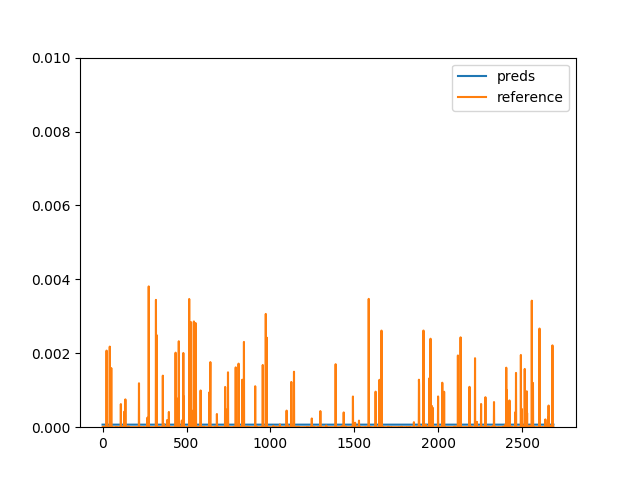

(0.0, 0.01)

In [68]:
plt.plot(list(range(len(predictions))), prediction_norms, label='preds')
plt.plot(list(range(len(predictions))), reference_norms, label='reference')
plt.legend()
ax = plt.gca()
#ax2 = ax.twinx()
ax.set_ylim([0.0, 0.01])

#ax2.plot(list(range(len(predictions))), gaussian_kl, color='red')
#plt.show()


In [154]:
gaussian_kl.max()

356.92773546121566

In [38]:
p = predictions[150]
ref = ys[validation_set[150]]

In [39]:
ref

array([[ 2.999e-07,  1.185e-08,  1.098e-08,  1.282e-09,  2.169e-09, -6.109e-09],
       [ 1.185e-08,  2.650e-08, -4.418e-09,  4.731e-10, -1.170e-09, -4.948e-10],
       [ 1.098e-08, -4.418e-09,  2.496e-08, -1.184e-09,  2.463e-09,  1.204e-10],
       [ 1.282e-09,  4.731e-10, -1.184e-09,  9.452e-10, -3.860e-10, -1.058e-10],
       [ 2.169e-09, -1.170e-09,  2.463e-09, -3.860e-10,  8.090e-10,  3.092e-11],
       [-6.109e-09, -4.948e-10,  1.204e-10, -1.058e-10,  3.092e-11,  4.659e-10]])

In [40]:
wishart_kl_divergence(ref, 6, p, 6)

49.27218534831394

In [41]:
p

array([[ 8.986e-05, -3.004e-07,  1.335e-06,  1.621e-08, -2.699e-07, -6.277e-07],
       [-3.004e-07,  2.725e-06,  5.143e-08,  4.375e-08,  1.904e-09, -5.640e-07],
       [ 1.335e-06,  5.143e-08,  1.037e-07,  8.898e-11, -7.000e-10, -4.506e-08],
       [ 1.621e-08,  4.375e-08,  8.898e-11,  5.720e-09, -2.598e-10, -1.616e-08],
       [-2.699e-07,  1.904e-09, -7.000e-10, -2.598e-10,  2.093e-09, -2.327e-11],
       [-6.277e-07, -5.640e-07, -4.506e-08, -1.616e-08, -2.327e-11,  5.336e-07]], dtype=float32)

In [42]:
ref

array([[ 2.999e-07,  1.185e-08,  1.098e-08,  1.282e-09,  2.169e-09, -6.109e-09],
       [ 1.185e-08,  2.650e-08, -4.418e-09,  4.731e-10, -1.170e-09, -4.948e-10],
       [ 1.098e-08, -4.418e-09,  2.496e-08, -1.184e-09,  2.463e-09,  1.204e-10],
       [ 1.282e-09,  4.731e-10, -1.184e-09,  9.452e-10, -3.860e-10, -1.058e-10],
       [ 2.169e-09, -1.170e-09,  2.463e-09, -3.860e-10,  8.090e-10,  3.092e-11],
       [-6.109e-09, -4.948e-10,  1.204e-10, -1.058e-10,  3.092e-11,  4.659e-10]])

In [43]:
p - ref

array([[ 8.956e-05, -3.123e-07,  1.324e-06,  1.493e-08, -2.720e-07, -6.216e-07],
       [-3.123e-07,  2.699e-06,  5.585e-08,  4.328e-08,  3.074e-09, -5.635e-07],
       [ 1.324e-06,  5.585e-08,  7.872e-08,  1.273e-09, -3.163e-09, -4.518e-08],
       [ 1.493e-08,  4.328e-08,  1.273e-09,  4.775e-09,  1.262e-10, -1.606e-08],
       [-2.720e-07,  3.074e-09, -3.163e-09,  1.262e-10,  1.284e-09, -5.419e-11],
       [-6.216e-07, -5.635e-07, -4.518e-08, -1.606e-08, -5.419e-11,  5.331e-07]])

array([[ 2.986e+02, -2.636e+01,  1.206e+02,  1.165e+01, -1.254e+02,  1.017e+02],
       [-2.636e+01,  1.019e+02, -1.264e+01,  9.146e+01, -2.627e+00,  1.139e+03],
       [ 1.206e+02, -1.264e+01,  3.153e+00, -1.075e+00, -1.284e+00, -3.752e+02],
       [ 1.165e+01,  9.146e+01, -1.075e+00,  5.052e+00, -3.269e-01,  1.518e+02],
       [-1.254e+02, -2.627e+00, -1.284e+00, -3.269e-01,  1.587e+00, -1.753e+00],
       [ 1.017e+02,  1.139e+03, -3.752e+02,  1.518e+02, -1.753e+00,  1.144e+03]])